### GPU

In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="1"

### IMPORTS

In [2]:
import torch
import torchvision
import PIL
from tqdm import tqdm
from sklearn.metrics import mean_squared_error
from IPython.display import display
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from autopilot_dataset import AutopilotDataset
from autopilot_model import AutopilotModel
from autopilot_utils import preprocess_image

<br>

### HYPERPARAMETERS

In [3]:
BATCH_SIZE = 128
MAX_EPOCHS = 50
EARLY_STOPPING_PATIENCE = 10

INITIAL_LR = 0.0005
LR_REDUCER_PATIENCE = 2
LR_REDUCER_FACTOR = 0.9

ACCEPTABLE_TESTING_LOSS = 0.1

FRAME_SIZE = 224

MODELS_DIR = "/home/greg/models/jetson/"
DATASETS_DIR = "/home/greg/datasets/jetson/"

VERSION = "2_16"

MODEL_PATH = MODELS_DIR + VERSION + "_resnet18" + ".pth"
TRAINING_DATASET = DATASETS_DIR + "training/"
VALIDATION_DATASET = DATASETS_DIR + "validation/"
TESTING_DATASET = DATASETS_DIR + "testing/"

<br>

### DATA

In [4]:
training_dataset = AutopilotDataset(TRAINING_DATASET,
                                    FRAME_SIZE,
                                    random_horizontal_flip=True,
                                    random_noise=True,
                                    random_blur=True,
                                    random_color_jitter=True,
                                    keep_images_in_ram=True)
training_loader = torch.utils.data.DataLoader(training_dataset,
                                              batch_size=BATCH_SIZE,
                                              shuffle=True)

validation_dataset = AutopilotDataset(VALIDATION_DATASET,
                                      FRAME_SIZE,
                                      random_horizontal_flip=False,
                                      random_noise=False,
                                      random_blur=False,
                                      random_color_jitter=False,
                                      keep_images_in_ram=True)
validation_loader = torch.utils.data.DataLoader(validation_dataset,
                                                batch_size=BATCH_SIZE,
                                                shuffle=True)

testing_dataset = AutopilotDataset(TESTING_DATASET,
                                   FRAME_SIZE,
                                   random_horizontal_flip=False,
                                   random_noise=False,
                                   random_blur=False,
                                   random_color_jitter=False,
                                   keep_images_in_ram=True)
testing_loader = torch.utils.data.DataLoader(testing_dataset,
                                                batch_size=1,
                                                shuffle=False)

Generated dataset of 63463 items
Generated dataset of 21670 items
Generated dataset of 16 items


<br>

### MODEL

In [5]:
model = AutopilotModel(pretrained=True)
optimizer = torch.optim.Adam(model.parameters(), lr=INITIAL_LR)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer,
                                                       'min',
                                                       patience=LR_REDUCER_PATIENCE,
                                                       factor=LR_REDUCER_FACTOR,
                                                       verbose=True)  
loss_function = torch.nn.MSELoss()

<br>

### TRAINING

Validation Epoch 0: 100%|██████████| 170/170 [00:18<00:00,  9.29batch/s]


validation loss decreased to 0.031707255388883984, saving model


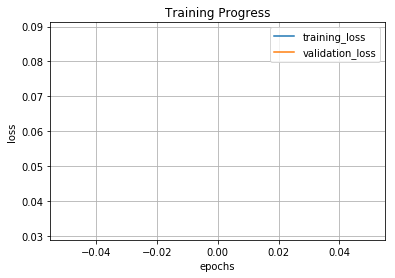

Validation Epoch 1: 100%|██████████| 170/170 [00:18<00:00,  9.20batch/s]


validation loss decreased to 0.03063120010363705, saving model


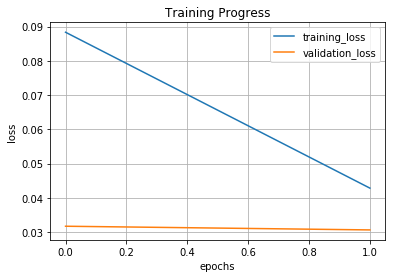

Validation Epoch 2: 100%|██████████| 170/170 [00:18<00:00,  9.20batch/s]


validation loss decreased to 0.025673740274985046, saving model


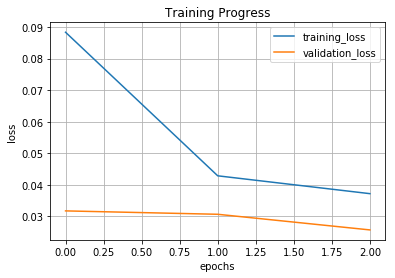

Validation Epoch 3: 100%|██████████| 170/170 [00:18<00:00,  9.13batch/s]


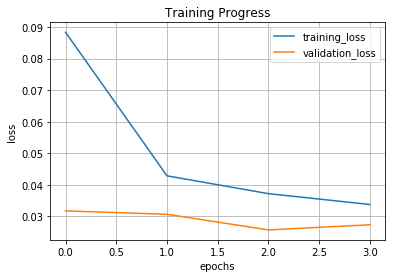

Validation Epoch 4: 100%|██████████| 170/170 [00:18<00:00,  9.21batch/s]


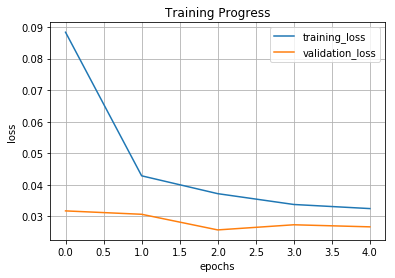

Validation Epoch 5: 100%|██████████| 170/170 [00:19<00:00,  8.58batch/s]


Epoch     6: reducing learning rate of group 0 to 4.5000e-04.


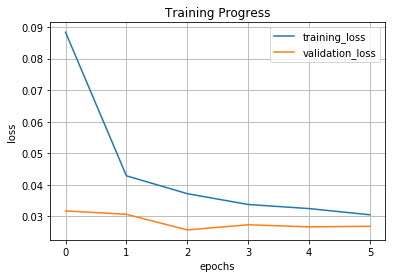

Validation Epoch 6: 100%|██████████| 170/170 [00:18<00:00,  9.20batch/s]


validation loss decreased to 0.025347553757841097, saving model


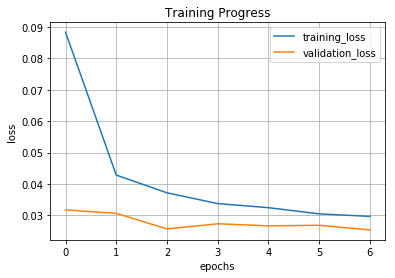

Validation Epoch 7: 100%|██████████| 170/170 [00:19<00:00,  8.80batch/s]


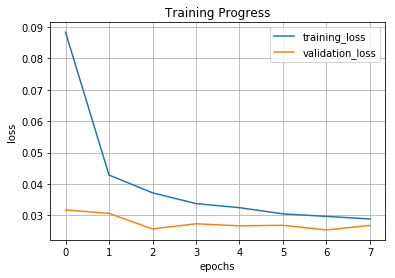

Validation Epoch 8: 100%|██████████| 170/170 [00:18<00:00,  9.25batch/s]


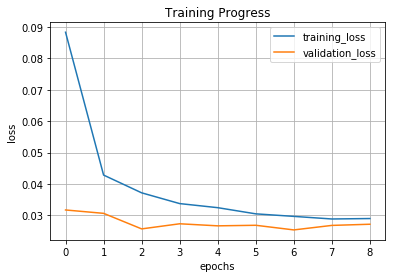

Validation Epoch 9: 100%|██████████| 170/170 [00:18<00:00,  9.22batch/s]


validation loss decreased to 0.02450380870962844, saving model


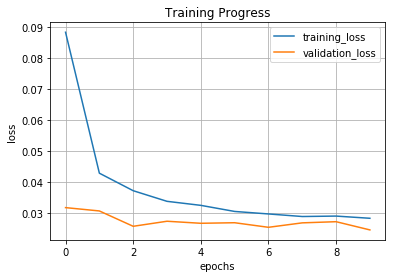

Validation Epoch 10: 100%|██████████| 170/170 [00:18<00:00,  9.10batch/s]


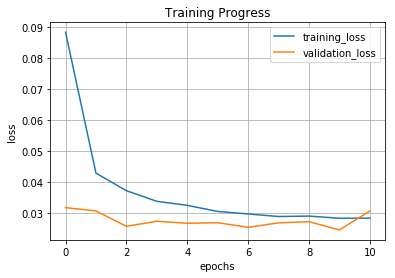

Validation Epoch 11: 100%|██████████| 170/170 [00:18<00:00,  9.11batch/s]


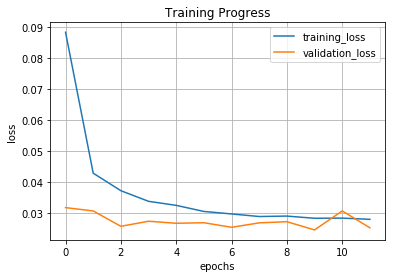

Validation Epoch 12: 100%|██████████| 170/170 [00:18<00:00,  8.95batch/s]


Epoch    13: reducing learning rate of group 0 to 4.0500e-04.


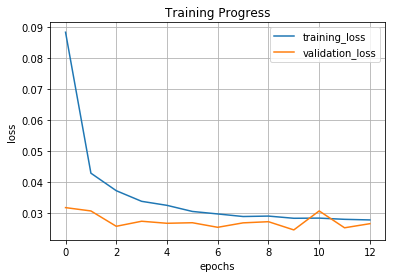

Validation Epoch 13: 100%|██████████| 170/170 [00:18<00:00,  9.14batch/s]


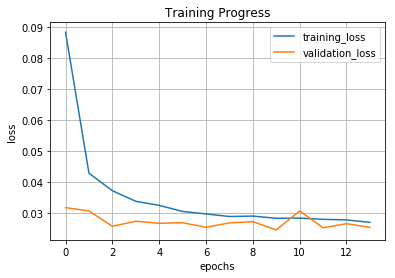

Validation Epoch 14: 100%|██████████| 170/170 [00:19<00:00,  8.52batch/s]


validation loss decreased to 0.02407755105591872, saving model


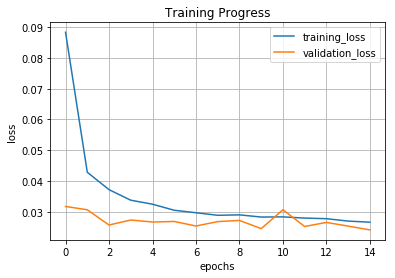

Validation Epoch 15: 100%|██████████| 170/170 [00:18<00:00,  9.26batch/s]


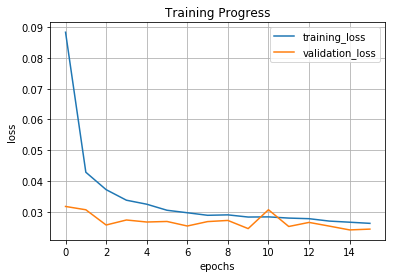

Validation Epoch 16: 100%|██████████| 170/170 [00:19<00:00,  8.93batch/s]


validation loss decreased to 0.022862816717037382, saving model


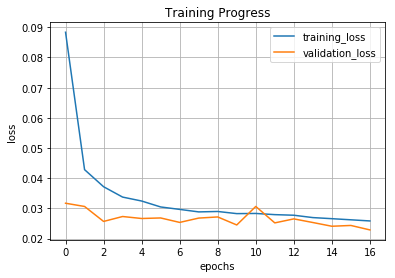

Validation Epoch 17: 100%|██████████| 170/170 [00:18<00:00,  9.11batch/s]


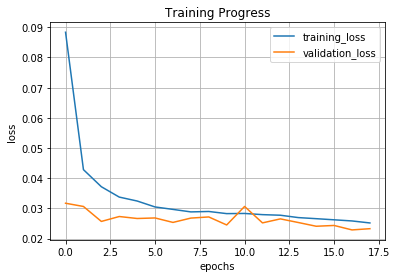

Validation Epoch 18: 100%|██████████| 170/170 [00:18<00:00,  9.21batch/s]


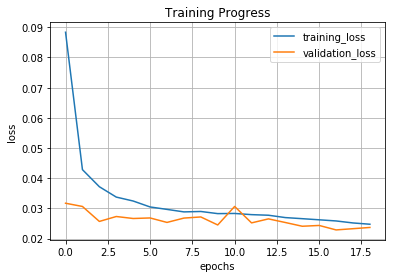

Validation Epoch 19: 100%|██████████| 170/170 [00:18<00:00,  9.07batch/s]


Epoch    20: reducing learning rate of group 0 to 3.6450e-04.


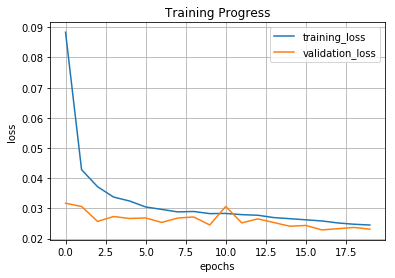

Validation Epoch 20: 100%|██████████| 170/170 [00:18<00:00,  9.19batch/s]


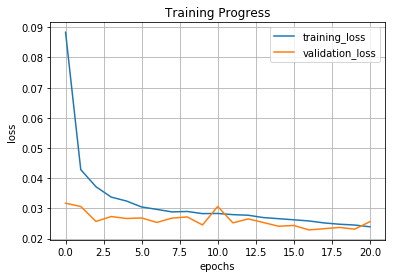

Validation Epoch 21: 100%|██████████| 170/170 [00:18<00:00,  9.43batch/s]


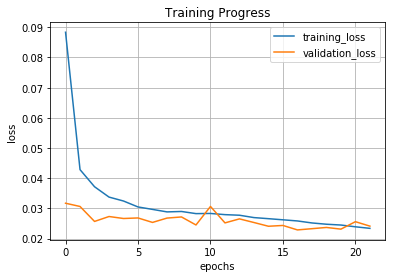

Validation Epoch 22: 100%|██████████| 170/170 [00:18<00:00,  9.21batch/s]


Epoch    23: reducing learning rate of group 0 to 3.2805e-04.


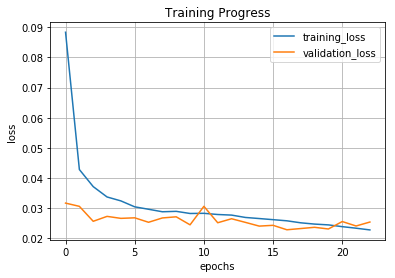

Validation Epoch 23: 100%|██████████| 170/170 [00:18<00:00,  9.24batch/s]


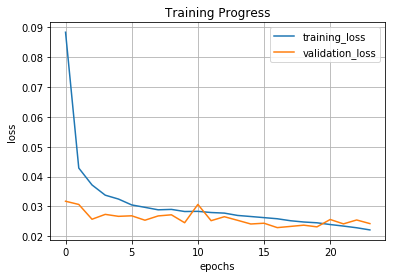

Validation Epoch 24: 100%|██████████| 170/170 [00:19<00:00,  8.55batch/s]


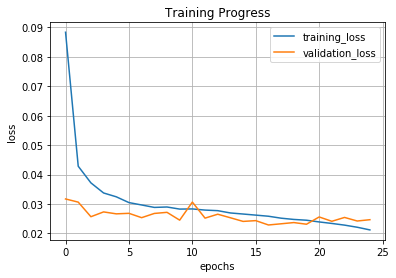

Validation Epoch 25: 100%|██████████| 170/170 [00:18<00:00,  9.21batch/s]


Epoch    26: reducing learning rate of group 0 to 2.9525e-04.


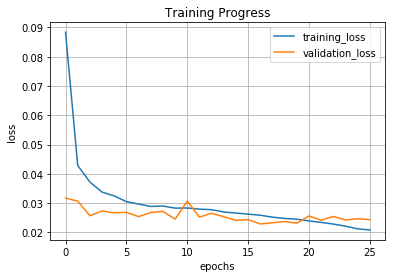

Validation Epoch 26: 100%|██████████| 170/170 [00:18<00:00,  9.30batch/s]

validation loss of 0.022862816717037382 hasn't improved in last 10 epochs, stopping training


In [6]:
training_losses = []
validation_losses = []
epochs_without_improvement = 0

def plot_losses():
    fig, ax = plt.subplots()
    ax.plot([x for x in range(len(training_losses))], training_losses, label='training_loss')
    ax.plot([x for x in range(len(validation_losses))], validation_losses, label='validation_loss')
    ax.set(xlabel='epochs', ylabel='loss', title='Training Progress')
    ax.grid()
    plt.legend()
    plt.show()
    
def run_epoch(tepoch, name, training):
    epoch_loss = 0.0
    iterations = 0
    
    for _, images, annotations in tepoch:
        tepoch.set_description(f"{name} Epoch {epoch}")

        images = images.cuda()
        annotations = annotations.cuda()
        
        if training:
            optimizer.zero_grad()
            model.train()
            outputs = model(images)
        else:
            with torch.no_grad():
                model.eval()
                outputs = model(images)
        
        loss = loss_function(outputs, annotations)
        
        if training:
            loss.backward()
            optimizer.step()

        epoch_loss += loss.item()
        iterations += 1
        
    return float(epoch_loss/iterations)

for epoch in range(MAX_EPOCHS):
    with tqdm(training_loader, unit="batch") as training_epoch:
        avg_training_loss = run_epoch(training_epoch, "Training", training=True)
        training_losses.append(avg_training_loss)
    
    with tqdm(validation_loader, unit="batch") as validation_epoch:
        avg_validation_loss = run_epoch(validation_epoch, "Validation", training=False)
        scheduler.step(avg_validation_loss)
        validation_losses.append(avg_validation_loss)
        
        if avg_validation_loss <= np.min(validation_losses):
            epochs_without_improvement = 0
            print("validation loss decreased to " + str(avg_validation_loss) + ", saving model")
            model.save_to_path(MODEL_PATH)
        else:
            epochs_without_improvement += 1
            if epochs_without_improvement >= EARLY_STOPPING_PATIENCE:
                print("validation loss of " + str(np.min(validation_losses)) + " hasn't improved in last " + str(EARLY_STOPPING_PATIENCE) + " epochs, stopping training")
                break
        
    plot_losses()

<br>

### TESTING

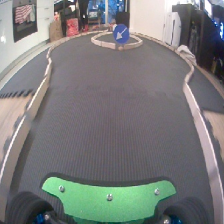

straight-1608302689215
expected: tensor([ 0.0000, -0.5000])
predicted: tensor([-0.0111, -0.4864])
loss: 0.0002
passed: True



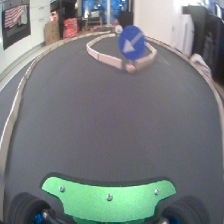

crossroads_left-1608302690045
expected: tensor([ 0.4600, -0.5000])
predicted: tensor([ 0.6200, -0.4879])
loss: 0.0129
passed: True



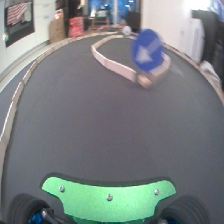

crossroads_left-1608302690248
expected: tensor([ 0.4600, -0.5000])
predicted: tensor([ 0.7919, -0.4904])
loss: 0.0551
passed: True



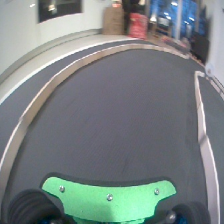

turn_right-1608302691902
expected: tensor([-0.8300, -0.5000])
predicted: tensor([-0.5993, -0.4966])
loss: 0.0266
passed: True



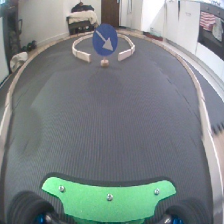

crossroads_right-1608302741661
expected: tensor([-0.6800, -0.5000])
predicted: tensor([-0.5186, -0.4923])
loss: 0.0131
passed: True



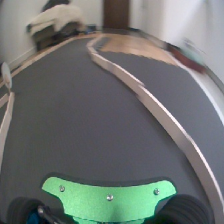

turn_left-1608302745997
expected: tensor([ 1.0000, -0.5000])
predicted: tensor([ 0.9980, -0.4895])
loss: 0.0001
passed: True



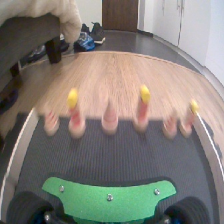

stop-1608302750746
expected: tensor([0., 0.])
predicted: tensor([-0.0231, -0.1190])
loss: 0.0073
passed: True



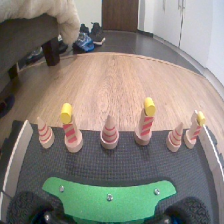

stop-1608302751159
expected: tensor([0., 0.])
predicted: tensor([-0.0225, -0.1287])
loss: 0.0085
passed: True



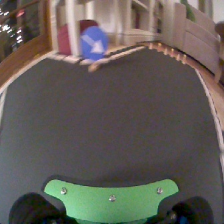

crossroads_right-1608391557626
expected: tensor([-0.5700, -0.5000])
predicted: tensor([-0.5913, -0.4923])
loss: 0.0003
passed: True



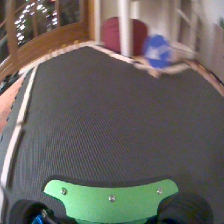

crossroads_left-1608391747364
expected: tensor([ 0.5600, -0.5000])
predicted: tensor([ 0.6790, -0.4872])
loss: 0.0072
passed: True



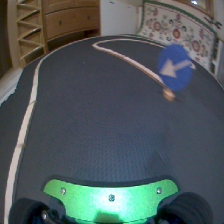

crossroads_left-1608475360009
expected: tensor([ 0.4100, -0.5000])
predicted: tensor([ 0.4607, -0.4860])
loss: 0.0014
passed: True



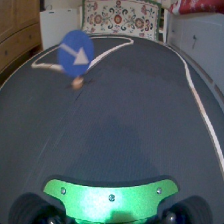

crossroads_right-1608475263993
expected: tensor([-0.3100, -0.5000])
predicted: tensor([-0.5742, -0.4939])
loss: 0.0349
passed: True



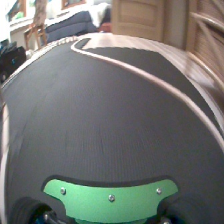

bear_left-1608476321373
expected: tensor([ 0.5000, -0.5000])
predicted: tensor([ 0.5607, -0.4876])
loss: 0.0019
passed: True



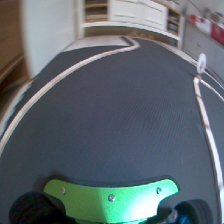

bear_right-1608476221444
expected: tensor([-0.5000, -0.5000])
predicted: tensor([-0.5694, -0.4955])
loss: 0.0024
passed: True



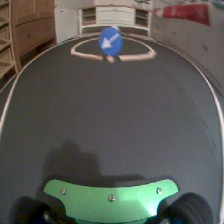

crossroads_bear_left-1608476335616
expected: tensor([ 0.5000, -0.5000])
predicted: tensor([ 0.6694, -0.4841])
loss: 0.0145
passed: True



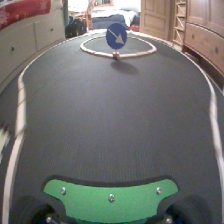

crossroads_bear_right-1608476318068
expected: tensor([-0.5000, -0.5000])
predicted: tensor([ 0.0382, -0.4848])
loss: 0.145
passed: False

SCORE: 15/16, AVG LOSS: 0.0207


In [7]:
model.load_from_path(MODEL_PATH)

results = []
losses = []
with torch.no_grad():
    model.eval()
    
    for name, image, annotation in testing_loader:
        prediction = model(image.cuda()).clamp(min=-1, max=1)
        loss = round(float(loss_function(prediction, annotation.cuda()).cpu()), 4)
        passed = loss < ACCEPTABLE_TESTING_LOSS
        losses.append(loss)
        results.append(passed)
               
        composed_transforms = torchvision.transforms.Compose([
            torchvision.transforms.Normalize([-0.485/0.229, -0.456/0.224, -0.406/0.225], [1/0.229, 1/0.224, 1/0.225]),
            torchvision.transforms.ToPILImage()
        ])
        image = composed_transforms(image[0])
        image = image.convert("RGB")
        display(image)
        
        print(name[0])
        print("expected: "+str(annotation.float()[0]))
        print("predicted: "+str(prediction.cpu().float()[0]))
        print("loss: "+str(loss))
        print("passed: "+str(passed))
        print("")

print("SCORE: "+str(len([x for x in results if x]))+"/"+str(len(results))+", AVG LOSS: "+str(round(np.mean(losses), 4)))    